# Project : Case Study Olympics

# Link of Dataset: https://drive.google.com/file/d/1GES833H2Au-blbw9RgZf5dujzDpzi_MG/view?usp=sharing

# Question 1 - Print the shape

## In this case study, you are going to explore the Olympic dataset. But before you get insights from the dataset let's understand the dataset. To understand the dataset first read the dataset and print the dataset.

# Answer 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
a=pd.read_csv('C:\\Users\\lokes\\Downloads\\olympics.csv')
print(a.shape)

(271116, 17)


# Question 2 - Describe the Age column

## Describe the Age column of the dataset on various parameters using describe API.

# Answer 2

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

a = pd.read_csv('C:\\Users\\lokes\\Downloads\\olympics.csv')

print(a['Age'].describe())

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64


# Question 3 - Print numeric datatypes

## Print the list of columns that have numeric datatypes.

# Answer 3

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('C:\\Users\\lokes\\Downloads\\olympics.csv')

print(olympics.select_dtypes(include=np.number).columns.tolist())

['ID', 'Age', 'Height', 'Weight', 'Year']


# Question 4 - Null values

## Print the columns that contain null values along with the count of null values present in each column.

# Answer 4

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('C:\\Users\\lokes\\Downloads\\olympics.csv')

for x in olympics.columns:
    if olympics[x].isnull().values.ravel().sum() > 0:
        print('{} - {}'.format(x,olympics[x].isnull().values.ravel().sum()))

Age - 9474
Height - 60171
Weight - 62875
Medal - 231333
region - 370
notes - 266077


 # Question 5 - Handling Missing Values

## Now you need to handle these missing values.
## For the columns "Height, Weight and notes", you are going to drop these columns as they are not required in our further analysis.
## For the "region" column, remove all the rows where the region column is having null values.
## For output print the shape of the dataset after performing these operations.

# Answer 5

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('C:\\Users\\lokes\\Downloads\\olympics.csv')

olympics.drop(['Height', 'Weight','notes'], axis = 1,inplace=True)
olympics.dropna(subset = ['region'],inplace=True)
print(olympics.shape)

(270746, 14)


# Question 6 - Replace missing values

## Still there are missing values present in the "Medal" column.
## Let's replace these missing values with 'DNW'. DNW means Did not win

# Answer 6

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('C:\\Users\\lokes\\Downloads\\olympics.csv')

#####################################
olympics.drop(columns=["notes", "Height", "Weight"], inplace=True)

olympics = olympics[pd.notnull(olympics['region'])]
#####################################

olympics['Medal']=olympics['Medal'].fillna('DNW')


print(olympics['Medal'].value_counts())

DNW       230972
Gold       13371
Bronze     13291
Silver     13112
Name: Medal, dtype: int64


# Question 7 - Handling Missing Values Using Mean

## You have an Age column that contains some null values. Rather than deleting them, fill these missing values by (means of the age of the players belonging to that particular game).

# Answer 7

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('C:\\Users\\lokes\\Downloads\\olympics.csv')

##########################################
##### Missing Values handled till now ####
olympics.drop(columns=["notes", "Height", "Weight"], inplace=True)

olympics = olympics[pd.notnull(olympics['region'])]

olympics['Medal'].fillna('DNW', inplace = True)
############################################

mean_age = round(olympics.groupby('Sport')['Age'].mean())

age_loc = olympics.loc[olympics.Age.isnull()].index

for i in age_loc:
  olympics.loc[i, "Age"] = mean_age[olympics.loc[i, "Sport"]]

print(round(olympics.Age.mean()))

26


# Question 8 - Probability Distribution of Age

## Calculate the probability distribution of the Age column.
## Firstly plot the line chart to get the idea of the range of probability distribution and then print the maximum probability distribution in the range of 5.

# Answer 8

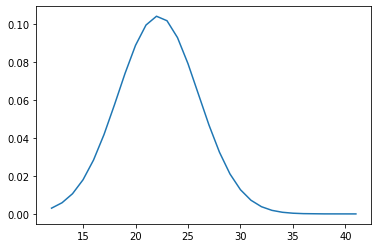

20 to 25


In [8]:
from scipy.stats import norm
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('C:\\Users\\lokes\\Downloads\\olympics.csv')

swimming_age = olympics.loc[(olympics["Sport"] == "Swimming") & (olympics["Year"] >= 2000) & (olympics["Year"] <= 2016)]["Age"]

swimming_age = sorted(swimming_age)

mean_swimming_age = np.mean(swimming_age)
std_swimming_age = np.std(swimming_age)

probability_pdf = norm.pdf(swimming_age, loc=mean_swimming_age, scale=std_swimming_age)

plt.plot(swimming_age, probability_pdf)
plt.show()

print("20 to 25")

# Question9 - Find Skewness

# Is the overall distribution of Gold Medals tally of India, left or negatively skewed?

# Answer 9

In [9]:
import scipy.stats as st
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('C:\\Users\\lokes\\Downloads\\olympics.csv')

olympics.rename(columns = {'region':'Country'}, inplace = True)
india_medals = olympics.loc[(olympics["Country"] == "India") & (olympics["Medal"] == "Gold")]
gold_count = india_medals.groupby("Year")["Medal"].value_counts()


if st.skew(gold_count, bias=False) > 0:
  print("Right Skewed")
else:
  print("Left Skewed")

Left Skewed


# Question 10 - Standard Deviation of Gold Medals

# What is the standard deviation/error of the distribution of gold medals when the UK is hosting the Olympic games and when not hosting the games? (When games are hosted in the UK, the city is London.)

# Answer 10

In [10]:
import statistics

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('C:\\Users\\lokes\\Downloads\\olympics.csv')

london_medals_host = olympics.loc[(olympics["City"] == "London") & (olympics["region"] == "UK") & (olympics["Medal"] == "Gold")]

gold_count_host = london_medals_host.groupby("Year")["Medal"].value_counts()

london_medals_non_host = olympics.loc[(olympics["City"] != "London") & (olympics["region"] == "UK") & (olympics["Medal"] == "Gold")]

gold_count_non_host = london_medals_non_host.groupby("Year")["Medal"].value_counts()

host_stdev = statistics.stdev(gold_count_host)

non_host_stdev = statistics.stdev(gold_count_non_host)

print(host_stdev)
print(non_host_stdev)

71.97453253292676
18.14528124684469


# Question 11 - Standardize the Data

## Standardise the age of all the participants participating in the Shooting Competition and calculate this standardised data's mean and standard deviation.

# Answer 11

In [14]:
import statistics

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import math

olympics = pd.read_csv('C:\\Users\\lokes\\Downloads\\olympics.csv')
shooting = olympics[olympics['Sport'] == 'Shooting']
age = shooting['Age']
size = age.value_counts().sum()
std_age = np.std(age)
s_size = math.sqrt(size)
s_age = std_age/size
print(s_age.mean())
print(np.std(s_age))

0.0008067285381274306
0.0


# Question 12 - Correlation analysis

## Is Age positively correlated or negatively correlated with winning the medal?

# Answer 12

In [13]:
import statistics

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('C:\\Users\\lokes\\Downloads\\olympics.csv')

labels, categories = pd.factorize(olympics["Medal"])
olympics["medal_labels"] = labels

if olympics["Age"].corr(olympics["medal_labels"]) > 0:
    print("Positive")
    
else:
    print("Negative")

Positive


# Question 13 - Calculate IQR

## From the dataset, Calculate the IQR for the Age column.

# Answer 13

In [22]:
import statistics

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('C:\\Users\\lokes\\Downloads\\olympics.csv')
olympics.dropna(subset = ['Age'],inplace=True)
age_iqr = list(olympics["Age"])

Q1 = np.percentile(age_iqr, 25)

# Third quartile (Q3)
Q3 = np.percentile(age_iqr, 75)
  
# Interquaritle range (IQR)
IQR = Q3 - Q1
  
print(IQR)

7.0


# Question 14 - Summer olympics hosted

## In how many cities Summer Olympics been held so far?
## Also create a bar graph of the number of times cities hosted olympics

# Answer 14

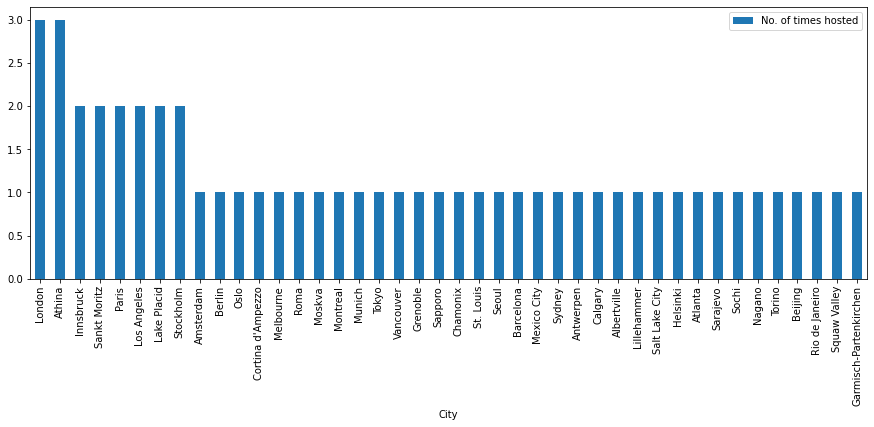

Total number of cities :  42


In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('C:\\Users\\lokes\\Downloads\\olympics.csv')

data = []

for city in olympics['City'].unique():
    host_count = 0
    for year in olympics['Year'].unique():
        if len(olympics[(olympics['City'] == city) & (olympics['Year'] == year)]) > 0:
            host_count += 1
    data.append([city, host_count])

plot_data = pd.DataFrame(data,columns = ['City','No. of times hosted']).sort_values(by='No. of times hosted', ascending = False)
plot_data.plot(x = 'City', y = 'No. of times hosted', kind = 'bar', figsize = (15,5))
plt.show()

Total_cities = len(olympics['City'].unique())
print("Total number of cities : ",Total_cities)

# Question 15 - Most number of medals

## Which sport is having the most number of medals so far?
## First plot the bar chart to find out the top 5 sports that have the most number of medals and then print the sport having the highest medals.

# Answer 15

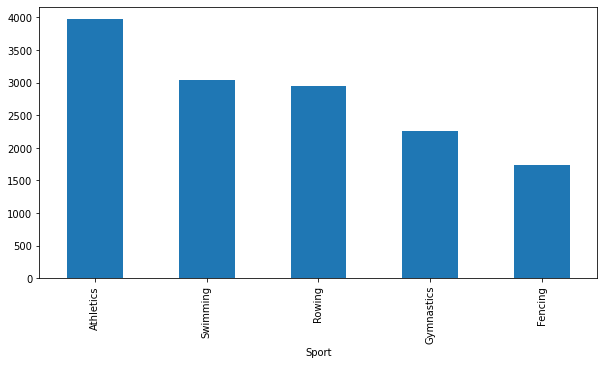

Athletics


In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('C:\\Users\\lokes\\Downloads\\olympics.csv')

olympics.groupby('Sport').count()["Medal"].sort_values(ascending = False).head().plot.bar(figsize = (10, 5))
plt.show()

print("Athletics")

# Question 16 - Most number of Gold medals

## Which Sport has the most number of Gold Medals so far?
## First plot the bar chart to find out the top 5 sports that have the most number Gold of medals and then print the sport having the highest number of Gold medals.

# Answer 16

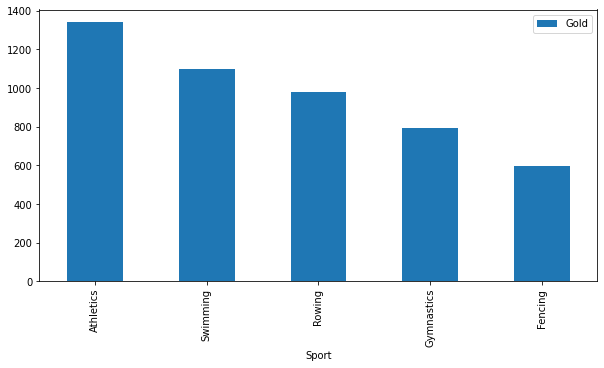

Athletics


In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('C:\\Users\\lokes\\Downloads\\olympics.csv')

gold = olympics[olympics['Medal'] == 'Gold']

data = []
for sport in gold['Sport'].unique():
    data.append([sport, len(gold[gold['Sport'] == sport])])

data = pd.DataFrame(data, columns = ['Sport', 'Gold']).sort_values(by='Gold', ascending = False).head()
data.plot(x='Sport', y='Gold', kind='bar', figsize=(10,5))
plt.show()

print("Athletics")

# Question 17 - India First Gold Medal

## In which year did India win the first Gold Medal in the Olympics?

# Answer 17

In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('C:\\Users\\lokes\\Downloads\\olympics.csv')

gold = olympics[olympics['Medal'] == 'Gold']
print(gold[gold['region'] == 'India']['Year'].min())

1924


# Question 18 - Most Popular Event

## Which event is most popular in terms of the number of players?
## First plot the bar chart to find out the top 5 sports that have the most number of participants and then print the sport having the highest number of players participating.

# Answer 18

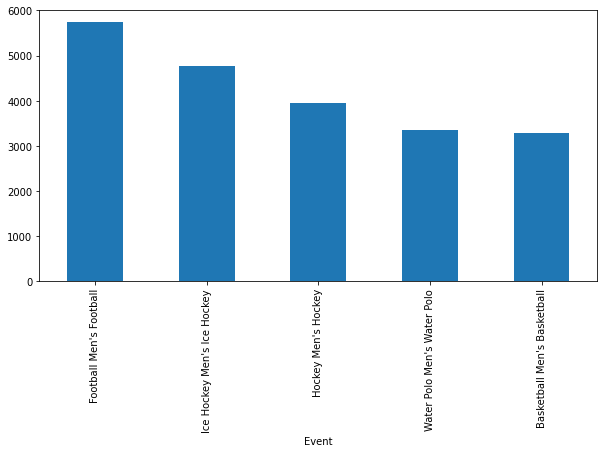

Football Men's Football


In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('C:\\Users\\lokes\\Downloads\\olympics.csv')

popular_event = olympics.groupby("Event").count()['Name'].sort_values(ascending = False).head().plot.bar(figsize=(10, 5))
plt.show()

print("Football Men's Football")

# Question 19 - Most Female Gold Medalists

## Which sport is having the most female Gold Medalists?
## First plot the bar chart to find out the top 5 sports that have the most female Gold Medalists and then print the sport having the most female Gold Medalists.

# Answer 19

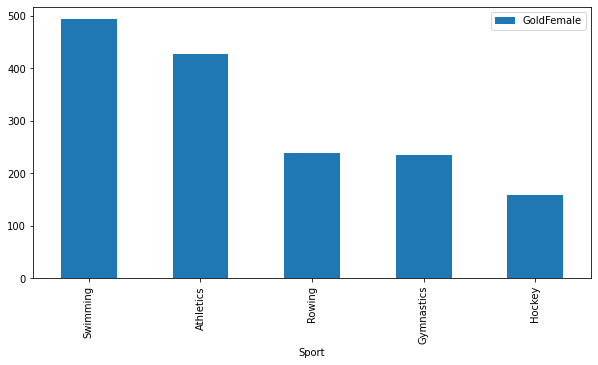

Swimming


In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('C:\\Users\\lokes\\Downloads\\olympics.csv')

gold = olympics[olympics['Medal'] == 'Gold']
gold_female = gold[gold['Sex'] == 'F']

data = []
for sport in gold_female['Sport'].unique():
    data.append([sport, len(gold_female[gold_female['Sport']== sport])])
    
data = pd.DataFrame(data, columns=['Sport', 'GoldFemale']).sort_values(by = 'GoldFemale', ascending = False).head()
data.plot(x='Sport', y='GoldFemale', kind='bar', figsize=(10,5))
plt.show()

print("Swimming")